In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

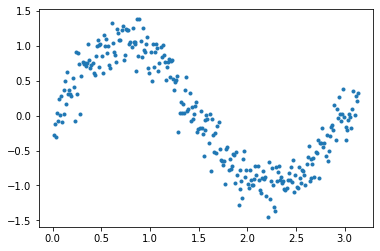

In [3]:
#plotting training data
data = pd.read_csv('trainRegression.csv')
plt.plot(data['X'],data['R'],'.')
numpydata = data.to_numpy()

In [4]:
#regression Models

def linear_model(x,y):
    A = np.array([ 
        [x.size, x.sum()], 
        [x.sum(), (np.dot(x,x)).sum()] 
    ])
    B = np.array([ [y.sum()], [(np.dot(y,x)).sum()] ])
    return A,B

def quadratic_model(x,y):
    A = np.array([
        [x.size, x.sum(), (np.dot(x,x)).sum()],
        [x.sum(), (np.dot(x,x)).sum(), (x*x*x).sum()],
        [(np.dot(x,x)).sum(), (x*x*x).sum(), (x*x*x*x).sum()]
    ])
    B = np.array([[y.sum()], [(y*x).sum()], [(y*x*x).sum()]])
    return A,B

def cubic_model(x,y):
    A = A = np.array([
            [ x.size, x.sum(), (np.dot(x,x)).sum(), (x*x*x).sum()],
            [ x.sum(), (x*x).sum(), (x*x*x).sum(), (x*x*x*x).sum()],
            [(x*x).sum(), (x*x*x).sum(), (x*x*x*x).sum(), (x*x*x*x*x).sum()],
            [ (x*x*x).sum(), (x*x*x*x).sum(), (x*x*x*x*x).sum(), (x*x*x*x*x*x).sum() ]
        ])
    B = np.array([[y.sum()],[ (y*x).sum()],[(y*x*x).sum()  ],[ (y*x*x*x).sum()]])
    return A,B


In [5]:
#extracting values of x and r
x = data.values[:,0]
r = data.values[:,1]

In [6]:
#finding teetha matrix; X = A(inv)B
def find_teeta(model, x, r):
    if(model == 1):
        Matrix = linear_model(x,r)
        teeta = np.ones((2,1))
    if(model == 2):
        Matrix = quadratic_model(x,r)
        teeta = np.ones((3,1))
    if(model == 3):
        Matrix = cubic_model(x,r)
        teeta = np.ones((4,1))
    A = Matrix[0]
    B = Matrix[1]
    Ainv = np.linalg.inv(A)
    X = np.dot(Ainv,B)
    return X

In [7]:
#Plot the original training data along with predictions on the training data for all the regression models
def predictions(model, x , r):
    X = find_teeta(model,x,r)
    if(model == 1):
        prediction = X[0] + np.multiply(X[1],x)
    if(model == 2):
        prediction = X[0] + np.multiply(X[1],x) + np.multiply(X[2],(x*x))
    if(model == 3):
        prediction = X[0] + np.multiply(X[1],x) + np.multiply(X[2],(x*x)) + np.multiply(X[3],(x*x*x))
    plt.plot(x,r, '.')
    plt.plot(x,prediction,'.')
    plt.show()
    
    print("Mean Square Error")
    mean = 1/x.size * (sum((r - prediction)**2))
    print(mean, "\n")
    return X

Training data along with Predictions and Mean Square Error:

Linear Model:


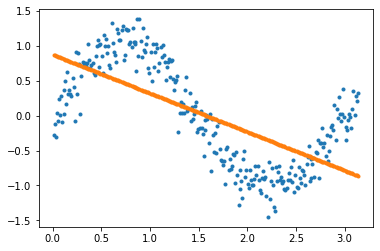

Mean Square Error
0.29907275382944987 

Quadratic Model:


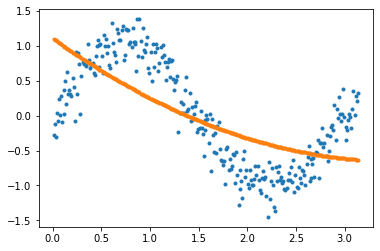

Mean Square Error
0.28827057037323023 

Cubic Model:


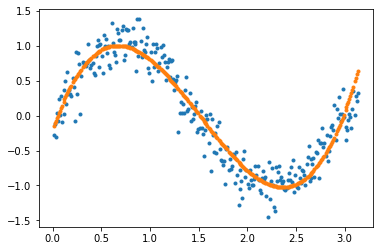

Mean Square Error
0.0496602553622156 



In [8]:
#Find the mean square error when the above models are fit to the training data.
print("Training data along with Predictions and Mean Square Error:\n")
print("Linear Model:")
X1 = predictions(1,x,r)
print("Quadratic Model:")
X2 = predictions(2,x,r)
print("Cubic Model:")
X3 = predictions(3,x,r)

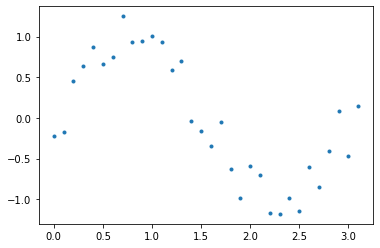

In [9]:
#plotting testing data
data2 = pd.read_csv('testRegression.csv')
plt.plot(data2['X'],data2['R'],'.')
x_test = data2.values[:,0]
r_test = data2.values[:,1]


In [10]:
# use the test data and make the predictions using the parameters of the above model found using only training data
def test_prediction(X, model, x, r):
    if(model == 1):
        prediction = X[0] + np.multiply(X[1],x)
    if(model == 2):
        prediction = X[0] + np.multiply(X[1],x) + np.multiply(X[2],(x*x))
    if(model == 3):
        prediction = X[0] + np.multiply(X[1],x) + np.multiply(X[2],(x*x)) + np.multiply(X[3],(x*x*x))
    plt.plot(x,r, '.')
    plt.plot(x,prediction,'.')
    plt.show()
    
    print("Mean Square Error")
    mean = 1/x.size * (sum((r - prediction)**2))
    print(mean, "\n")

Testing data and Mean Square Error:

Linear Model:


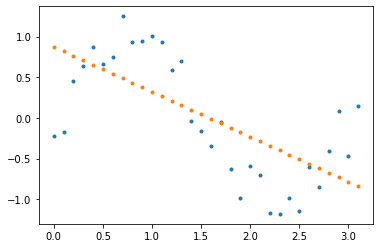

Mean Square Error
0.3159321720459775 

Quadratic Model:


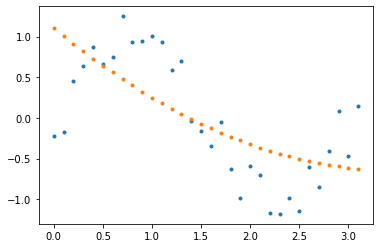

Mean Square Error
0.3260417959496289 

Cubic Model:


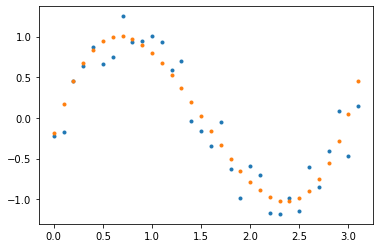

Mean Square Error
0.051542057690952534 



In [23]:
# Plot the test data along with the predictions and mean square error
print("Testing data and Mean Square Error:\n")
print("Linear Model:")
test_prediction(X1, 1, x_test, r_test)
print("Quadratic Model:")
test_prediction(X2, 2, x_test, r_test)
print("Cubic Model:")
test_prediction(X3, 3, x_test, r_test)

In [24]:
# Comment on the results

#The mean square error of cubic model is the least, 0.05, so it fits best to testing data as can also be seen.